In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



In [2]:

df= pd.read_csv('Basepourmodele.csv', encoding='latin-1')

In [3]:
df.describe()


,N,P,K,Mg,Pluviometrie,Humidite
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,147.400801,93.925323,157.882481,60.037812,1350.799311,79.857020
std,111.091972,91.735943,163.245337,60.366104,736.080518,11.512372
min,10.000000,8.000000,10.000000,3.000000,150.000000,7.000000
25%,70.000000,31.000000,55.000000,25.000000,800.000000,70.000000
50%,120.000000,75.000000,100.000000,55.000000,1200.000000,80.000000
75%,200.000000,110.000000,200.000000,75.000000,1800.000000,90.000000
max,650.000000,625.000000,1012.000000,625.000000,5000.000000,99.000000


In [4]:
df.head()



,Nom commun,N,P,K,Mg,pH,Temp,Pluviometrie,Humidite
0,Ble,84.0,55.0,252.0,19.0,6,16.5,400,70
1,Ble,182.0,55.0,252.0,19.0,7,18,500,90
2,Ble,280.0,55.0,252.0,19.0,7.5,21,450,85
3,Ble,84.0,55.0,252.0,19.0,7,27,500,75
4,Ble,182.0,55.0,252.0,19.0,7.5,16.5,400,88


In [5]:
df.tail()


,Nom commun,N,P,K,Mg,pH,Temp,Pluviometrie,Humidite
1156,Palmier dattier,80.0,24.0,20.0,15.0,7.4,35,450,90
1157,Palmier dattier,90.0,25.0,20.0,15.0,7.5,36,450,82
1158,Palmier dattier,100.0,30.0,20.0,15.0,7.6,37,450,83
1159,Palmier dattier,65.0,26.0,20.0,15.0,7.9,33,450,87
1160,Palmier dattier,75.0,29.0,20.0,15.0,8,35,450,89


In [6]:
#df.plot(kind='box', subplots=False, layout=(10,10), sharex=False, sharey=False)
#plt.show()

In [7]:
df = df.reset_index()

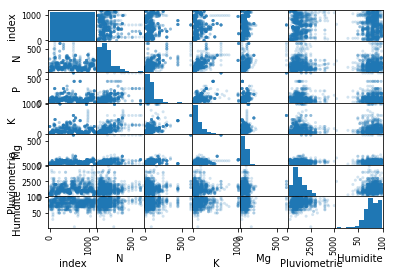

In [8]:
pd.plotting.scatter_matrix(df, alpha=0.2)
plt.show()

In [9]:
#sns.heatmap(df.corr(),annot=True)

In [10]:
features = df[['N','P','K','Mg','pH','Temp','Pluviometrie','Humidite']]
target = df['Nom commun']


In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.20,random_state= 1)

In [12]:
#Modèle Random Forest



RF = RandomForestClassifier(n_estimators=20, random_state=0)

RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

print("Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Accuracy is:  0.836909871245
                                    precision    recall  f1-score   support

                             Abaca       1.00      1.00      1.00         1
              Aeschynomene histrix       0.60      1.00      0.75         3
                               Ail       1.00      1.00      1.00         2
                         Aleurites       1.00      0.67      0.80         6
                          Amarante       1.00      1.00      1.00         4
                        Anacardier       1.00      1.00      1.00         2
                            Ananas       1.00      1.00      1.00         2
                Andropogon gayanus       0.00      0.00      0.00         0
                    Arbre à encens       0.33      1.00      0.50         1
                      Arbre à pain       1.00      1.00      1.00         3
                         Aubergine       1.00      1.00      1.00         1
                         Avocatier       1.00      1.00   

In [27]:
#Faire des prédictions
#'N/ha (en Kg)', 'P/ha (en Kg)','K/ha (en Kg)','Mg/ha (en Kg) ', 'Urée/ha (en Kg)', 'Fumier/ha (en t)', 'pH-sol', 'Temperature (en °C)', 'Pluviometrie (en mm)', 'Humidite (en %)'


données = np.array([[120, 40, 54, 40, 7, 33, 1700, 79]])
prediction = RF.predict(données)
print(prediction)

['Riz']


In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

print("DecisionTrees's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.137339055794
                                    precision    recall  f1-score   support

                             Abaca       0.12      1.00      0.22         1
              Aeschynomene histrix       0.00      0.00      0.00         3
                               Ail       0.00      0.00      0.00         2
                         Aleurites       0.00      0.00      0.00         6
                          Amarante       0.00      0.00      0.00         4
                        Anacardier       0.00      0.00      0.00         2
                            Ananas       0.20      1.00      0.33         2
                Andropogon gayanus       0.00      0.00      0.00         0
                    Arbre à encens       0.20      1.00      0.33         1
                      Arbre à pain       0.00      0.00      0.00         3
                         Arrachide       0.00      0.00      0.00         0
                         Aubergine       0

In [15]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.0729613733906
                                    precision    recall  f1-score   support

                             Abaca       0.00      0.00      0.00         1
              Aeschynomene histrix       0.00      0.00      0.00         3
                               Ail       1.00      0.50      0.67         2
                         Aleurites       0.03      1.00      0.05         6
                          Amarante       0.00      0.00      0.00         4
                        Anacardier       0.00      0.00      0.00         2
                            Ananas       0.00      0.00      0.00         2
                    Arbre à encens       0.00      0.00      0.00         1
                      Arbre à pain       0.00      0.00      0.00         3
                         Aubergine       0.00      0.00      0.00         1
                         Avocatier       0.00      0.00      0.00         1
                         Bananiers       0.00      

In [16]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.540772532189
                                    precision    recall  f1-score   support

                             Abaca       1.00      1.00      1.00         1
              Aeschynomene histrix       0.00      0.00      0.00         3
                               Ail       0.00      0.00      0.00         2
                         Aleurites       1.00      0.17      0.29         6
                          Amarante       1.00      0.25      0.40         4
                        Anacardier       1.00      0.50      0.67         2
                            Ananas       1.00      1.00      1.00         2
                Andropogon gayanus       0.00      0.00      0.00         0
                    Arbre à encens       0.50      1.00      0.67         1
                      Arbre à pain       1.00      0.33      0.50         3
                         Aubergine       1.00      1.00      1.00         1
                         Avocatier  

In [17]:
# Tester éventuellement Xgboost, LightGBM et faire des traitements de données pour faire marcher LogisticRegression et regarder les sorties à plusieurs options, prédiction conformale

In [21]:
#Faire des prédictions
#Nom commun	N	P	K	Mg	pH	Temp	Pluviometrie	Humidite



données = np.array([[120, 40, 54, 40, 7, 33, 1700, 79]])
prediction = LogReg.predict(données)
print(prediction)

['Vétiver']


In [18]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.901287553648
                                    precision    recall  f1-score   support

                             Abaca       1.00      1.00      1.00         1
              Aeschynomene histrix       0.75      1.00      0.86         3
                               Ail       1.00      1.00      1.00         2
                         Aleurites       1.00      0.33      0.50         6
                          Amarante       1.00      1.00      1.00         4
                        Anacardier       1.00      1.00      1.00         2
                            Ananas       1.00      1.00      1.00         2
                Andropogon gayanus       0.00      0.00      0.00         0
                    Arbre à encens       1.00      1.00      1.00         1
                      Arbre à pain       1.00      1.00      1.00         3
                         Aubergine       0.50      1.00      0.67         1
                         Avocatier       1.0

In [23]:
#Faire des prédictions
#Nom commun	N	P	K	Mg	pH	Temp	Pluviometrie	Humidite



données = np.array([[120, 40, 54, 40, 7, 33, 1700, 79]])
prediction = NaiveBayes.predict(données)
print(prediction)

['Pomme-rose ou jambrosade']


In [19]:
#!pip install xgboost
#import xgboost as xgb
#XB = xgb.XGBClassifier()
#XB.fit(Xtrain.astype('float'),Ytrain)

#predicted_values = XB.predict(Xtest.astype('float'))

#x = metrics.accuracy_score(Ytest, predicted_values)

#print("XGBoost's Accuracy is: ", x)

#print(classification_report(Ytest,predicted_values))

[16:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.849785407725
                                    precision    recall  f1-score   support

                             Abaca       1.00      1.00      1.00         1
              Aeschynomene histrix       0.75      1.00      0.86         3
                               Ail       1.00      1.00      1.00         2
                         Aleurites       1.00      0.83      0.91         6
                          Amarante       1.00      1.00      1.00         4
                        Anacardier       1.00      1.00      1.00         2
                            Ananas       1.00      1.00      1.00         2
                Andropogon gayanus       

In [22]:
#Faire des prédictions
#Nom commun	N	P	K	Mg	pH	Temp	Pluviometrie	Humidite



#données = np.array([[120, 40, 54, 40, 7, 33, 1700, 79]])
#prediction = XB.predict(données)
#print(prediction)

['Pomme-rose ou jambrosade']


In [20]:
#!pip install lightgbm

import lightgbm as ltb

modelltb = ltb.LGBMClassifier()

modelltb.fit(Xtrain.astype('float'),Ytrain)

predicted_values = modelltb.predict(Xtest.astype('float'))

x = metrics.accuracy_score(Ytest, predicted_values)

print("Lightgbm's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


Lightgbm's Accuracy is:  0.811158798283
                                    precision    recall  f1-score   support

                             Abaca       1.00      1.00      1.00         1
              Aeschynomene histrix       1.00      1.00      1.00         3
                               Ail       1.00      1.00      1.00         2
                         Aleurites       0.80      0.67      0.73         6
                          Amarante       1.00      1.00      1.00         4
                        Anacardier       1.00      1.00      1.00         2
                            Ananas       1.00      1.00      1.00         2
                Andropogon gayanus       0.00      0.00      0.00         0
                    Arbre à encens       0.50      1.00      0.67         1
                      Arbre à pain       1.00      0.67      0.80         3
                         Aubergine       0.50      1.00      0.67         1
                         Avocatier       1.00  

In [28]:
#Faire des prédictions
#Nom commun	N	P	K	Mg	pH	Temp	Pluviometrie	Humidite



données = np.array([[120, 40, 54, 40, 7, 33, 1700, 79]])
prediction = modelltb.predict(données)
print(prediction)

['Pomme-rose ou jambrosade']
